## Proyecto 1: Modelos de Regresión Lineal
#### Gabriela - 
#### Giovanni Santos - 22523
#### Santiago

### Análisis Exploratorio

##### Con el propósito de entender mejor los datos del conjunto de datos y lograr predecir el precio de los inmuebles, podemos hacer un análisis exploratorio 

#### Importar las librerías a utilizar

In [19]:
import pandas as pd
from ydata_profiling import ProfileReport    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split





%matplotlib inline

#### Leer archivo de datos

In [20]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


#### Para ver información general del dataset podemos utilizar head, info y describe. 

In [21]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Podemos observar una serie de características sobre el data set. Primero, que el data set tiene 81 columnas y 1460 datos. Además, nos damos cuenta de la columna que nos interesa principalmente para nuestra predicción es SalePrice que indica el precio de venta de la propiedad en dolares y, por lo tanto, es la variable objetivo. Podemos ver que el precio minimo de una casa no es de 0, por lo que no hay que tomarlo en cuenta. Mediante info nos damos cuenta que cada casa tiene características diferentes, como que no todas tienen piscina, y que hay valores faltantes para múltiples casas. 

Podemos seguir el análisis al idear una serie de preguntas sobre lo que nos parece interesante investigar. Ya respondimos cuestiones como si hay datos faltantes o cual es la variable objetivo. En consecuencia, nos podemos preguntar, ¿Cómo se distribuye el precio de las viviendas?

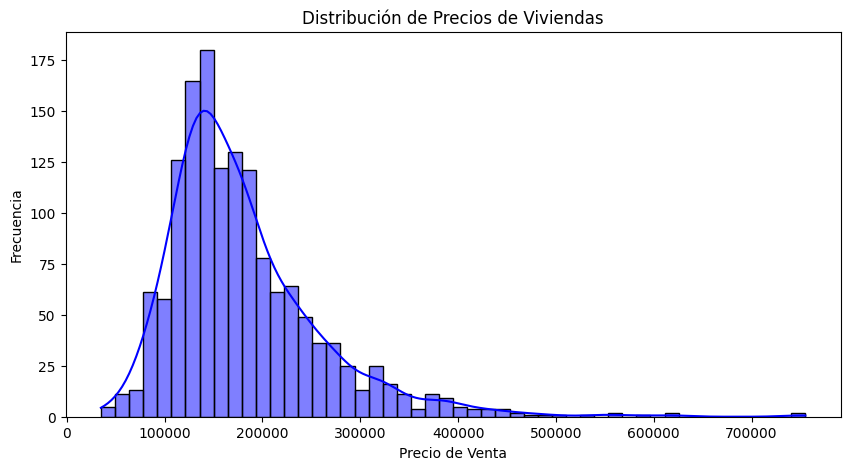

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train["SalePrice"], bins=50, kde=True, color='blue')
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de Viviendas")
plt.show()

Podemos observar que el precio de venta con mayor frecuencia está entre 100000 y 200000 dolares y que se tiene una asimetría positiva. Para seguir con el análisis, podemos pensar cuáles son las otras variables que nos interesan y cuál es su relación con SalePrice. Para hacerlo, podemos ver como factores como el tamaño de la casa, la calidad de vivienda y el año de construcción influyen en el precio. Se nota que calidad de vivienda influye directamente en el precio, siendo las de mayor calidad las que más tienen precio de venta. Por otro lado, el tamaño de la casa influye en el incremento del precio, pero se tienen outliers en donde no siempre sucede que tenemos que manejar más adelante. Adicionalmente, se observa que las viviendas con precio más alto son las más recientes. 


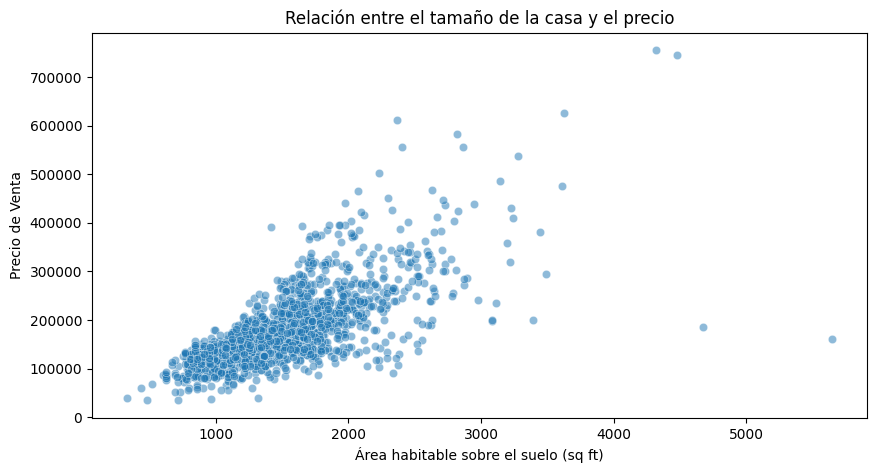

C:\Users\jmper\AppData\Local\Temp\ipykernel_28212\2311372623.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train["OverallQual"], y=df_train["SalePrice"], palette="viridis")


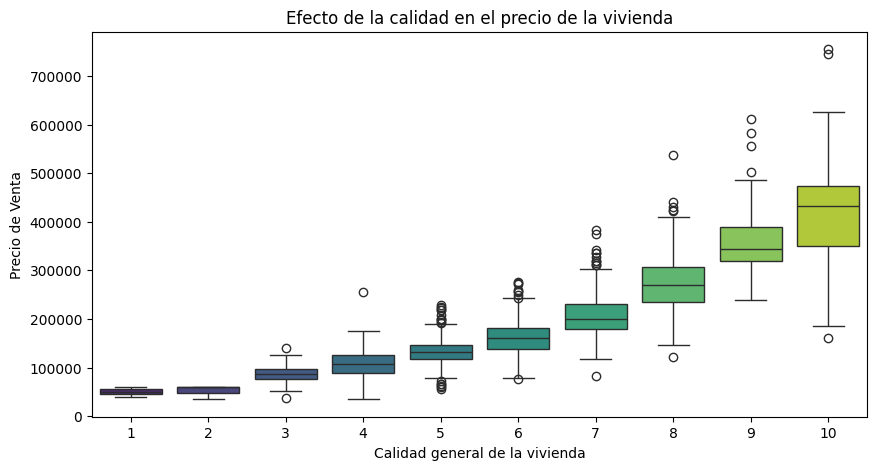

C:\Users\jmper\AppData\Local\Temp\ipykernel_28212\2311372623.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train["YearBuilt"], y=df_train["SalePrice"], palette="viridis")


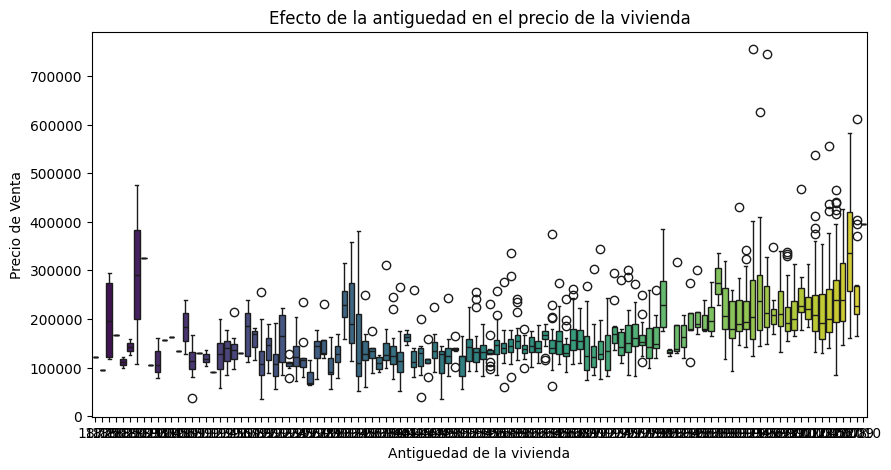

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_train["GrLivArea"], y=df_train["SalePrice"], alpha=0.5)
plt.xlabel("Área habitable sobre el suelo (sq ft)")
plt.ylabel("Precio de Venta")
plt.title("Relación entre el tamaño de la casa y el precio")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train["OverallQual"], y=df_train["SalePrice"], palette="viridis")
plt.xlabel("Calidad general de la vivienda")
plt.ylabel("Precio de Venta")
plt.title("Efecto de la calidad en el precio de la vivienda")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train["YearBuilt"], y=df_train["SalePrice"], palette="viridis")
plt.xlabel("Antiguedad de la vivienda")
plt.ylabel("Precio de Venta")
plt.title("Efecto de la antiguedad en el precio de la vivienda")
plt.show()



Para confirmar esto podemos ver la correlación de variables con el precio, esto se puede hacer mediante un mapa de calor. Al ver las 10 variables que tienen mayor correlación con el precio de venta de la vivienda podemos observar que factores que no habíamos analizado antes como Garage y Total Rooms Above Grade son importantes. 

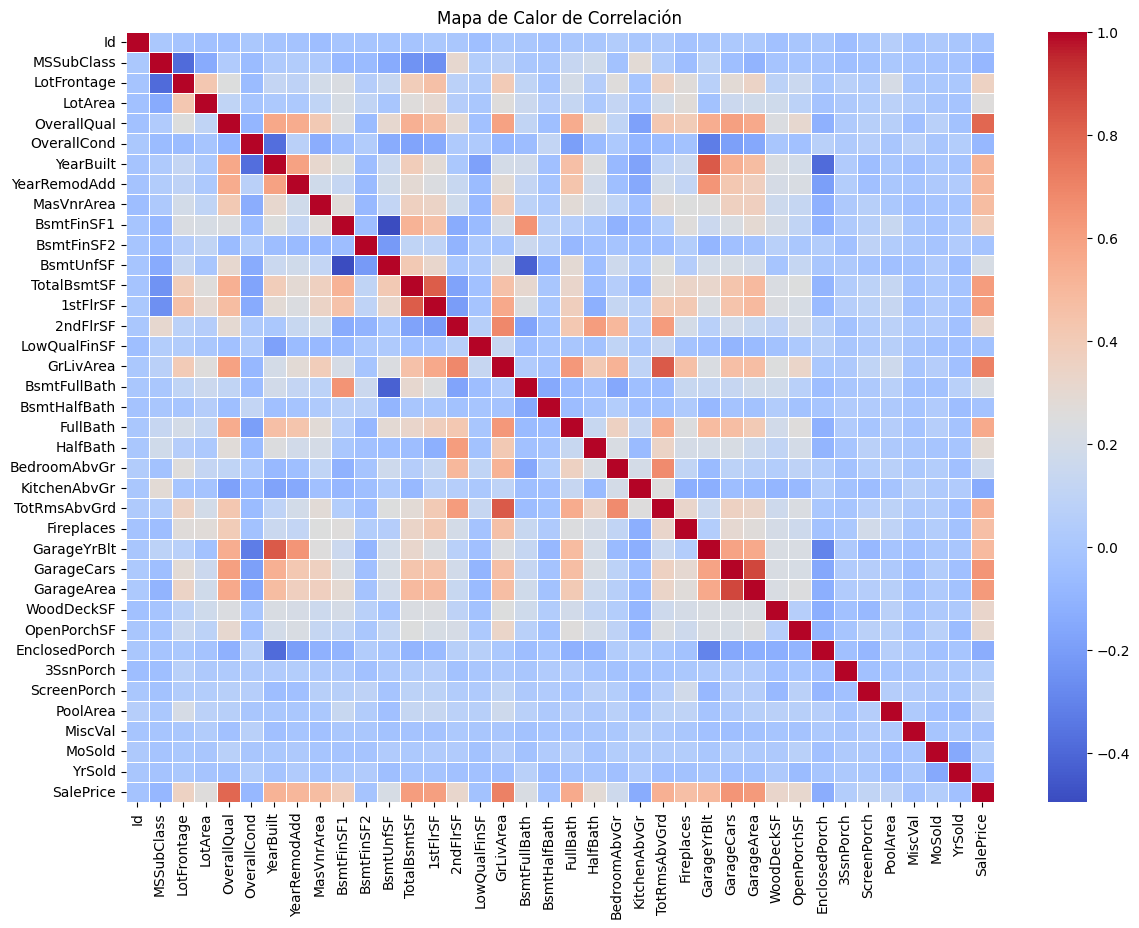

In [26]:
numeric_cols = df_train.select_dtypes(include=["number"])
plt.figure(figsize=(14,10))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()


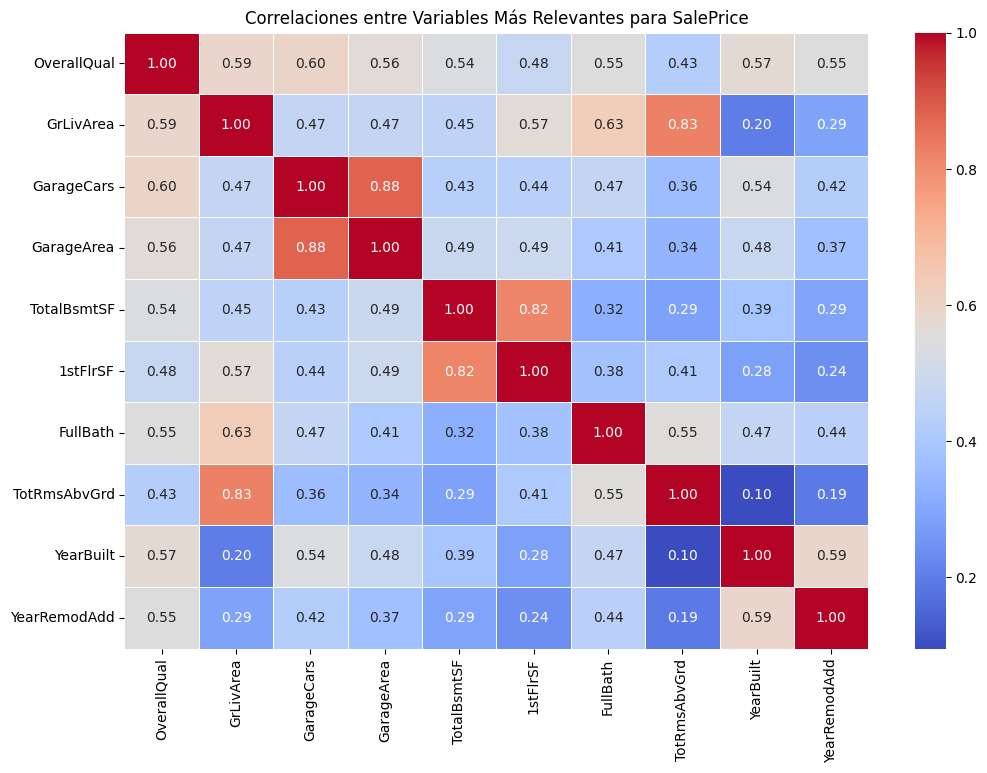

In [27]:
correlation = numeric_cols.corr()["SalePrice"].sort_values(ascending=False)
high_corr_vars = correlation[1:11].index  
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols[high_corr_vars].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlaciones entre Variables Más Relevantes para SalePrice")
plt.show()

Algo que nos puede servir es tener la distribución de las variables que nos pueden interesar en el futuro. 

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

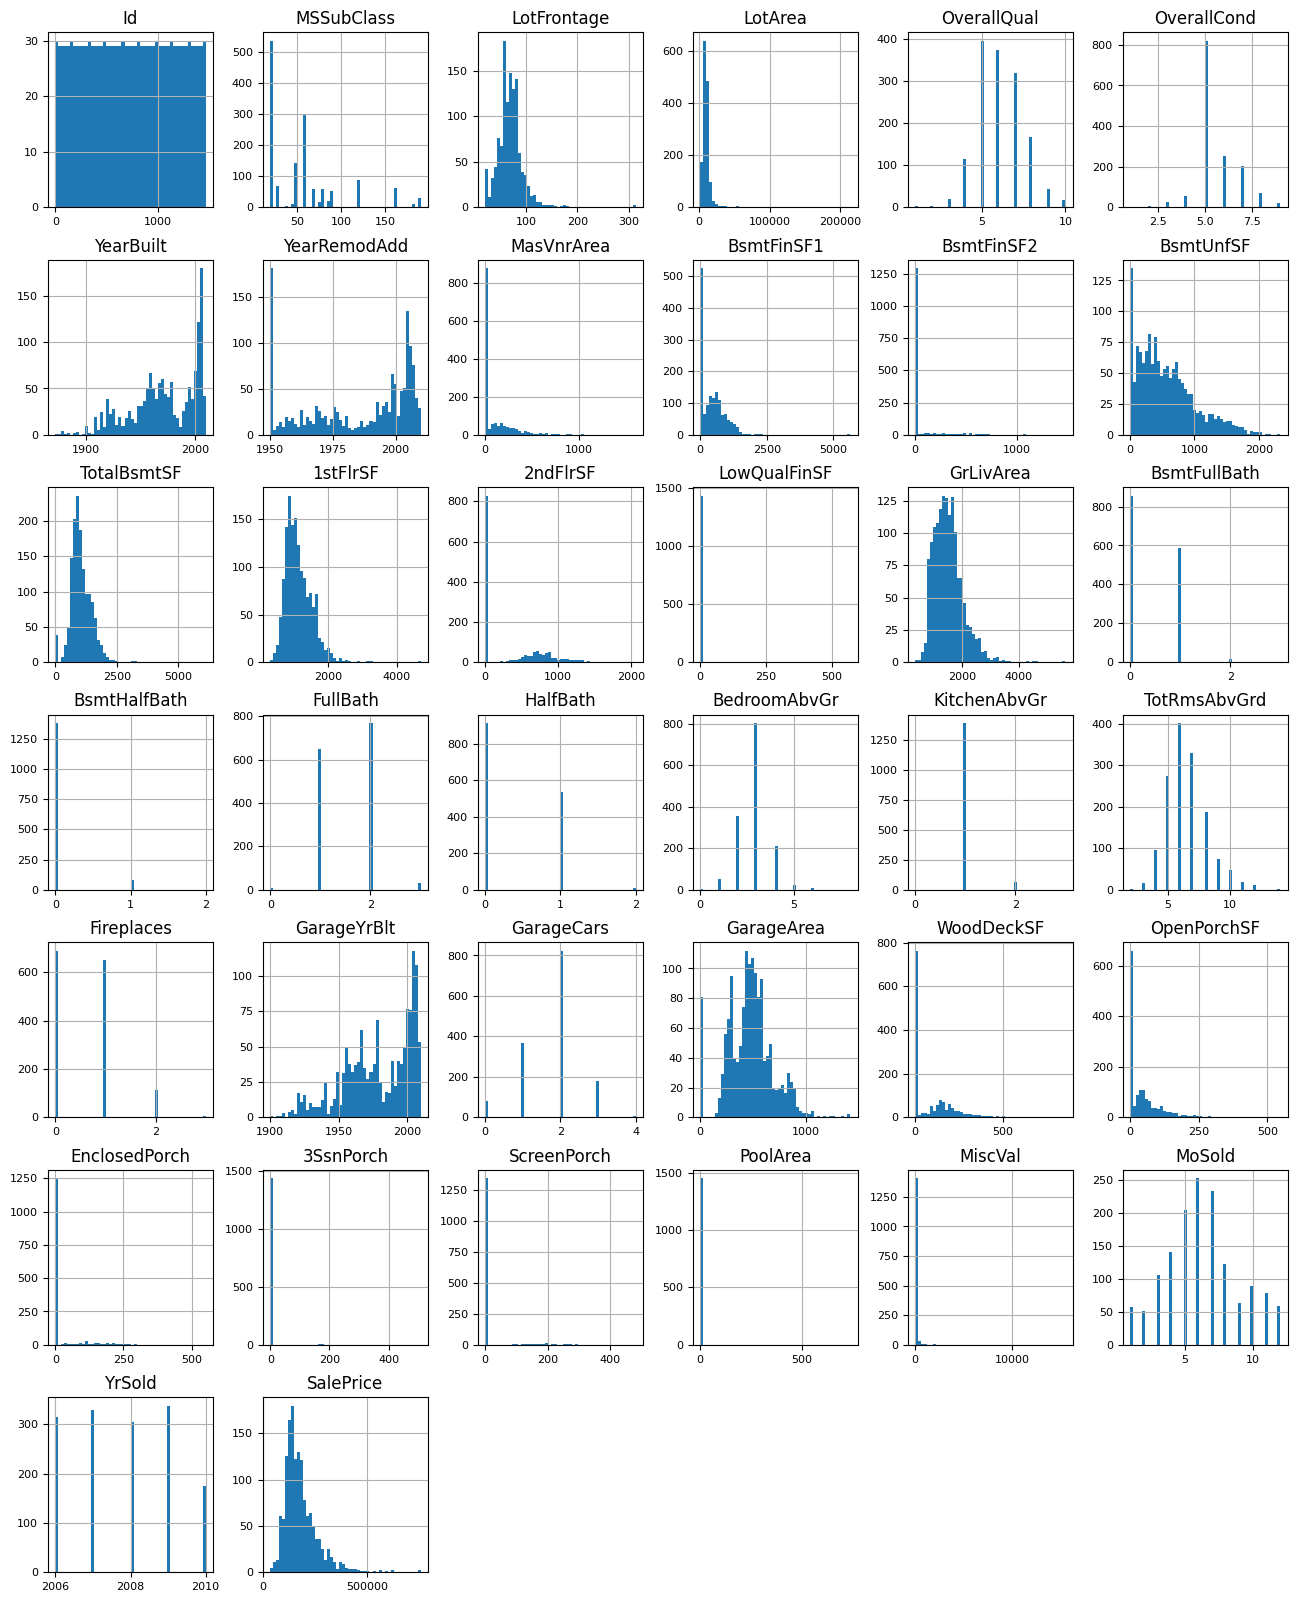

In [28]:
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Ahora debemos dividir el set de datos preprocesados en dos conjuntos: Entrenamiento y prueba, para hacerlo hay que empezar el pre procesamiento de datos. Como sabemos que hay datos faltantes, podemos observar cual es el total de estos y después hacer una decisión sobre cuales eliminar. 

In [29]:
##podemos realizar el split con una división 80% para entrenamiento y 20% para prueba.
train_set, test_set = train_test_split(df_train, test_size=0.2, random_state=42)

In [30]:
missing_values = train_set.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
PoolQC          1162
MiscFeature     1122
Alley           1094
Fence            935
MasVnrType       683
FireplaceQu      547
LotFrontage      217
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
BsmtFinType1      28
BsmtFinType2      28
BsmtExposure      28
BsmtCond          28
BsmtQual          28
MasVnrArea         6
Electrical         1
dtype: int64


Podemos eliminar todos los datos faltantes ya que no tienen correlación importante con SalePrice

In [31]:
missing_values = train_set.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valores faltantes por columna:")
print(missing_values)
train_set = train_set.drop(columns=missing_values.index)
print("\nResultado:")
print(train_set.columns)

Valores faltantes por columna:
PoolQC          1162
MiscFeature     1122
Alley           1094
Fence            935
MasVnrType       683
FireplaceQu      547
LotFrontage      217
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
BsmtFinType1      28
BsmtFinType2      28
BsmtExposure      28
BsmtCond          28
BsmtQual          28
MasVnrArea         6
Electrical         1
dtype: int64

Resultado:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea',

Ahora podemos aplicar el escalamiento de características, específicamente, al estandarizar los valores de SalePrice. Primero, observamos que teníamos outliers que tenemos que eliminar. Después, podemos proceder a estandarizar SalePrice. En consiguiente, podemos hacer un gráfico de probabilidad para verificar si tiene una distribución normal. 

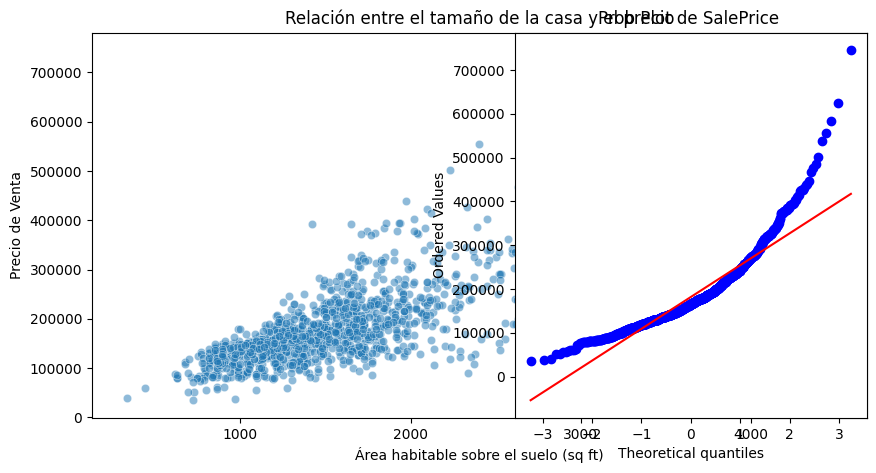

In [32]:
train_set = train_set.drop(train_set[(train_set['GrLivArea']>4000) & (train_set['SalePrice']<200000)].index)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=train_set["GrLivArea"], y=train_set["SalePrice"], alpha=0.5)
plt.xlabel("Área habitable sobre el suelo (sq ft)")
plt.ylabel("Precio de Venta")
plt.title("Relación entre el tamaño de la casa y el precio")

plt.subplot(1, 2, 2)
stats.probplot(train_set["SalePrice"], dist="norm", plot=plt)
plt.title("Prob Plot de SalePrice ")

plt.show()

Como no tiene la distribución que queremos, podemos aplicar una transformación logarítmica y luego realizar la estandarización de SalePrice. 

In [33]:
train_set["SalePrice"] = np.log1p(train_set["SalePrice"])

scaler = StandardScaler()
train_set["SalePrice"] = scaler.fit_transform(train_set[["SalePrice"]])


Podemos verificarlo al mostrar de nuevo el gráfico de probabilidad. Este nos muestra que ahora tenemos una distribución normal en su mayoría. 

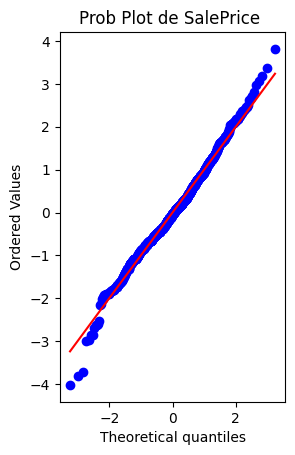

In [34]:
plt.subplot(1, 2, 2)
stats.probplot(train_set["SalePrice"], dist="norm", plot=plt)
plt.title("Prob Plot de SalePrice ")

plt.show()

### Todos los resultados deben ser reproducibles por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          4.52e-223
Time:                        11:23:54   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

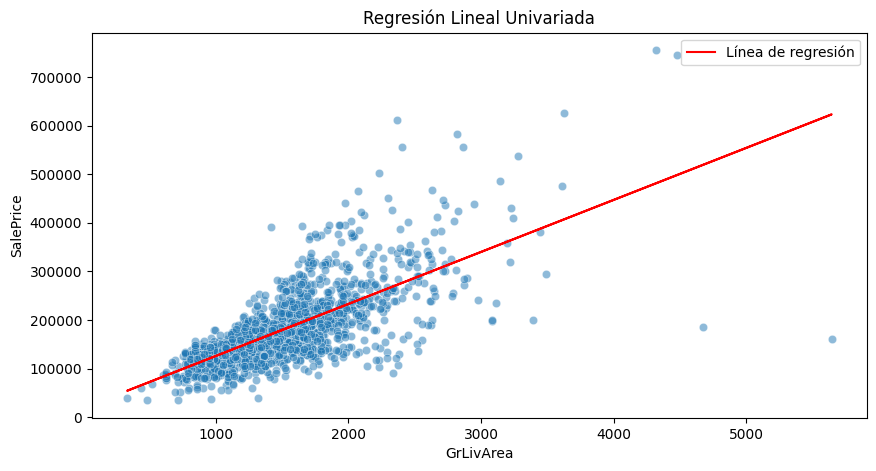

In [35]:

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

variable_univariada = "GrLivArea"

# Definir las variables
X = df_train[[variable_univariada]]  
y = df_train["SalePrice"]  


X = sm.add_constant(X)

modelo_univariado = sm.OLS(y, X).fit()


print(modelo_univariado.summary())

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_train[variable_univariada], y=df_train["SalePrice"], alpha=0.5)
plt.plot(df_train[variable_univariada], modelo_univariado.predict(X), color="red", label="Línea de regresión")
plt.xlabel(variable_univariada)
plt.ylabel("SalePrice")
plt.title("Regresión Lineal Univariada")
plt.legend()
plt.show()


### Seleccione una de las variables y haga un modelo univariado de regresión lineal para predecir el precio de las casas. Analice el modelo (resumen, residuos, resultados de la predicción). Muéstrelo gráficamente.

Valores NaN en el dataset antes de limpiar:
348
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     131.8
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:26:39   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1085   BIC:                         2.697e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

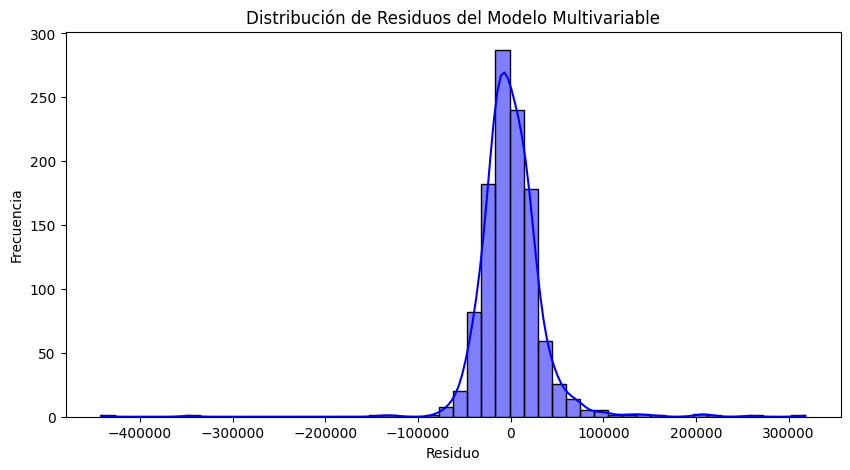

In [ ]:
X_multi = df_train.select_dtypes(include=["number"]).drop(columns=["SalePrice"])

X_multi = sm.add_constant(X_multi)

print("Valores NaN en el dataset antes de limpiar:")
print(X_multi.isnull().sum().sum())  

X_multi = X_multi.dropna()
y = y.loc[X_multi.index]  

X_multi.replace([np.inf, -np.inf], np.nan, inplace=True)

X_multi = X_multi.dropna()
y = y.loc[X_multi.index]  

modelo_multivariable = sm.OLS(y, X_multi).fit()

print(modelo_multivariable.summary())

plt.figure(figsize=(10, 5))
sns.histplot(modelo_multivariable.resid, bins=50, kde=True, color='blue')
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.title("Distribución de Residuos del Modelo Multivariable")
plt.show()


### Haga un modelo de regresión lineal con todas las variables numéricas para predecir el precio de las casas. Analice el modelo (resumen, residuos, resultados de la predicción). Muestre el modelo gráficamente.

Calculando VIF para detectar multicolinealidad...


C:\Users\jmper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         Variable           VIF
15       2ndFlrSF           inf
10     BsmtFinSF1           inf
17      GrLivArea           inf
16   LowQualFinSF           inf
14       1stFlrSF           inf
13    TotalBsmtSF           inf
12      BsmtUnfSF           inf
11     BsmtFinSF2           inf
0           const  2.396251e+06
7       YearBuilt  6.094850e+00
24   TotRmsAbvGrd  4.631822e+00
26    GarageYrBlt  4.572723e+00
28     GarageArea  4.448564e+00
27     GarageCars  4.314005e+00
5     OverallQual  3.461493e+00
20       FullBath  3.120675e+00
8    YearRemodAdd  2.747160e+00
22   BedroomAbvGr  2.288685e+00
21       HalfBath  2.269333e+00
18   BsmtFullBath  2.219913e+00
3     LotFrontage  1.827885e+00
6     OverallCond  1.765745e+00
2      MSSubClass  1.718790e+00
23   KitchenAbvGr  1.593948e+00
25     Fireplaces  1.585157e+00
9      MasVnrArea  1.464423e+00
4         LotArea  1.356288e+00
31  EnclosedPorch  1.320733e+00
30    OpenPorchSF  1.301930e+00
29     WoodDeckSF  1.234169e+00
34      

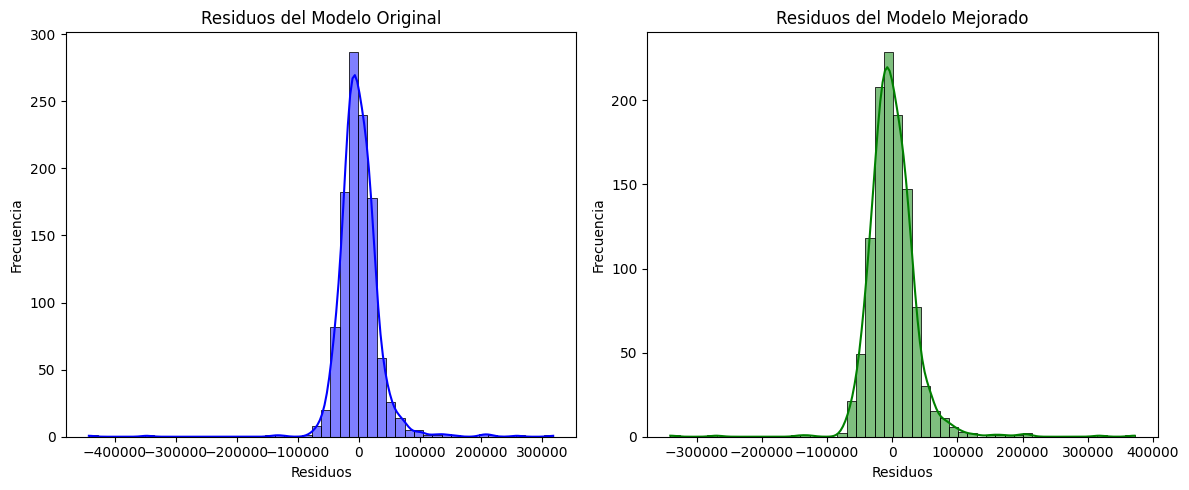

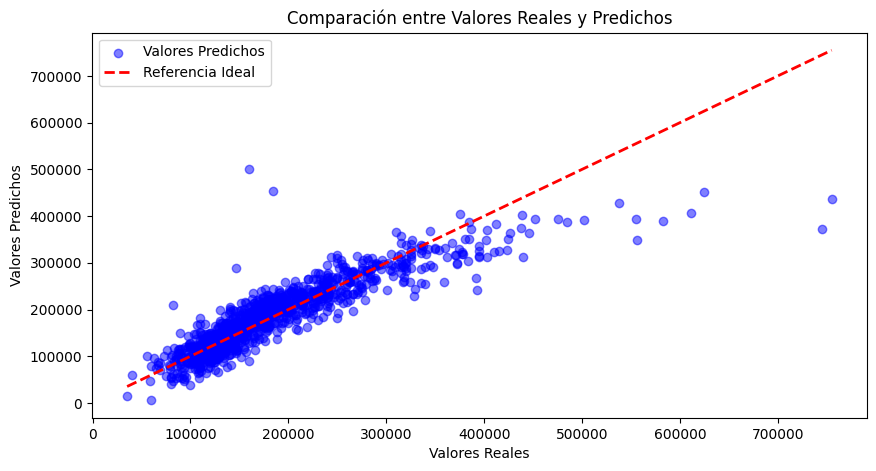

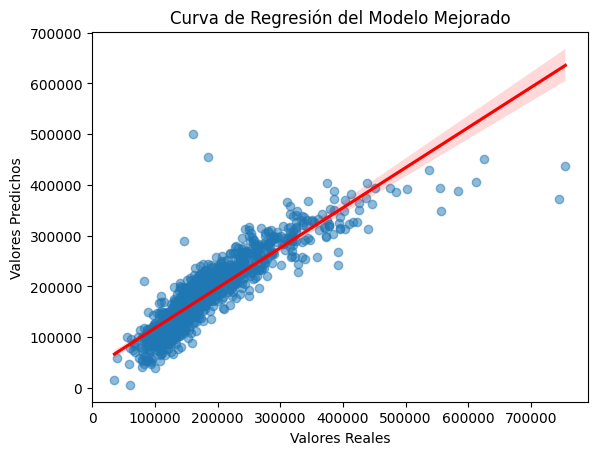

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calcular_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

print("Calculando VIF para detectar multicolinealidad...")
vif_inicial = calcular_vif(X_multi)
print(vif_inicial.sort_values(by="VIF", ascending=False))

variables_reducidas = vif_inicial[vif_inicial["VIF"] < 10]["Variable"].tolist()

if "const" not in variables_reducidas:
    variables_reducidas.insert(0, "const")

X_reducido = X_multi[variables_reducidas]

modelo_mejorado = sm.OLS(y, X_reducido).fit()

print(modelo_mejorado.summary())

y_pred = modelo_mejorado.predict(X_reducido)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"\nEvaluación del Modelo Mejorado:")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del MSE): {rmse:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(modelo_multivariable.resid, bins=50, kde=True, color="blue")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Residuos del Modelo Original")

plt.subplot(1, 2, 2)
sns.histplot(modelo_mejorado.resid, bins=50, kde=True, color="green")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Residuos del Modelo Mejorado")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred, alpha=0.5, color="blue", label="Valores Predichos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="dashed", lw=2, label="Referencia Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

sns.regplot(x=y, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Curva de Regresión del Modelo Mejorado")
plt.show()

### Analice el modelo. Determine si hay multicolinealidad entre las variables, y cuáles son las que aportan al modelo. Haga un análisis de correlación de las características del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no. En caso de existir sobreajuste, haga otro modelo que lo corrija.


 Análisis de Multicolinealidad: Factor de Inflación de Varianza (VIF)
         Variable           VIF
0           const  2.392589e+06
7       YearBuilt  5.324655e+00
18    GarageYrBlt  4.473503e+00
20     GarageArea  4.287147e+00
19     GarageCars  4.258506e+00
16   TotRmsAbvGrd  3.473342e+00
5     OverallQual  3.033227e+00
8    YearRemodAdd  2.661797e+00
12       FullBath  2.650060e+00
14   BedroomAbvGr  2.182609e+00
3     LotFrontage  1.783350e+00
6     OverallCond  1.717183e+00
2      MSSubClass  1.537009e+00
15   KitchenAbvGr  1.500655e+00
17     Fireplaces  1.485477e+00
13       HalfBath  1.484653e+00
9      MasVnrArea  1.374137e+00
4         LotArea  1.319331e+00
23  EnclosedPorch  1.302928e+00
10   BsmtFullBath  1.266348e+00
22    OpenPorchSF  1.254869e+00
21     WoodDeckSF  1.210097e+00
25    ScreenPorch  1.139428e+00
26       PoolArea  1.130860e+00
27        MiscVal  1.092282e+00
11   BsmtHalfBath  1.084393e+00
28         MoSold  1.060184e+00
29         YrSold  1.053296e+00
2

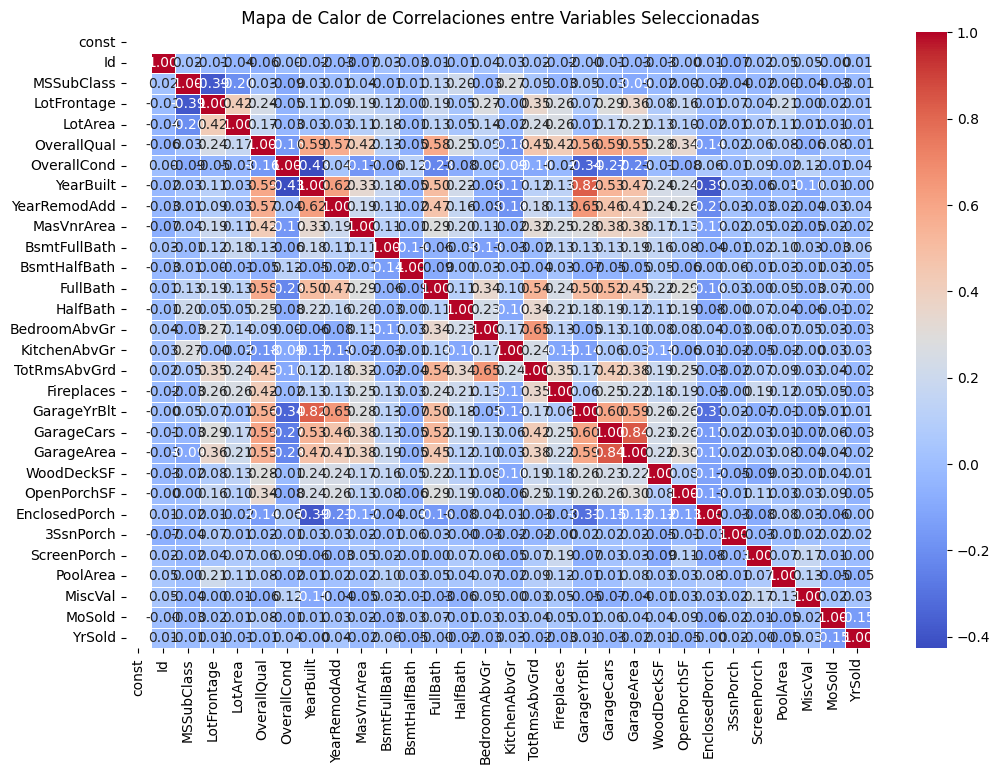


 Evaluación del Modelo en Entrenamiento:
MAE: 24329.43
MSE: 1357175585.12
RMSE: 36839.86
R²: 0.7946

 Evaluación del Modelo en Prueba:
MAE: 26274.27
MSE: 1874908673.86
RMSE: 43300.22
R²: 0.7623

 No sobreajuste en el modelo.


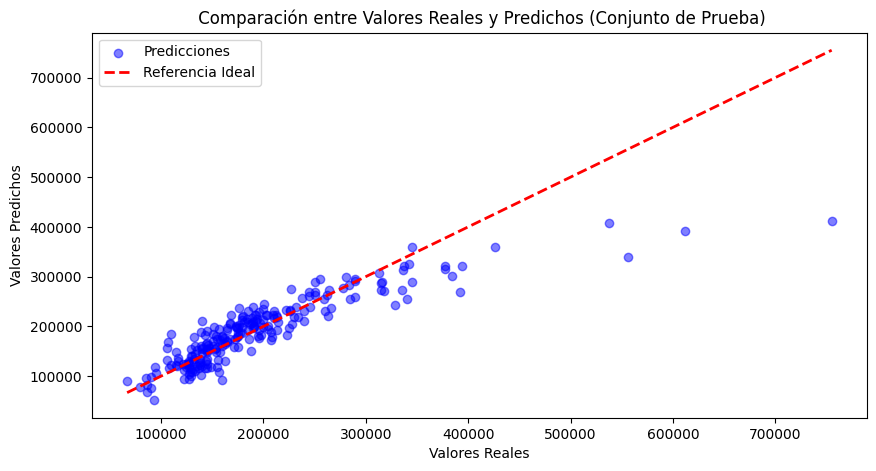

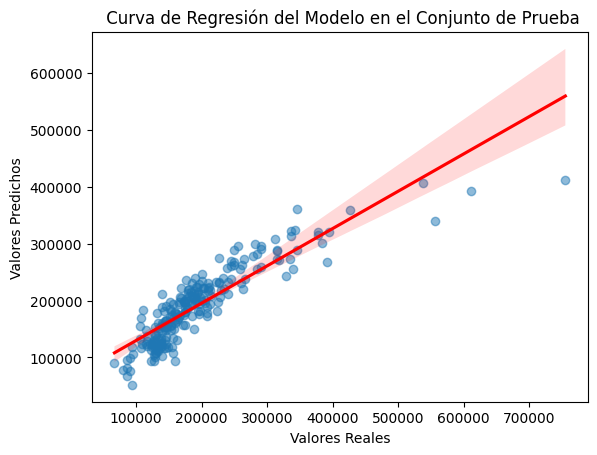

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\n Análisis de Multicolinealidad: Factor de Inflación de Varianza (VIF)")
vif_data = pd.DataFrame()
vif_data["Variable"] = X_reducido.columns
vif_data["VIF"] = [variance_inflation_factor(X_reducido.values, i) for i in range(X_reducido.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(X_reducido.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title(" Mapa de Calor de Correlaciones entre Variables Seleccionadas")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_reducido, y, test_size=0.2, random_state=42)

modelo_final = sm.OLS(y_train, X_train).fit()

y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\n Evaluación del Modelo en Entrenamiento:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.4f}")

print("\n Evaluación del Modelo en Prueba:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.4f}")

if abs(r2_train - r2_test) > 0.1:
    print("\n El modelo presenta signos de sobreajuste. Se ajustará un nuevo modelo con menos variables.")

    variables_ajustadas = vif_data[vif_data["VIF"] < 5]["Variable"].tolist()

    if "const" not in variables_ajustadas:
        variables_ajustadas.insert(0, "const")

    X_train_reducido = X_train[variables_ajustadas]
    X_test_reducido = X_test[variables_ajustadas]

    modelo_corregido = sm.OLS(y_train, X_train_reducido).fit()

    y_pred_test_corregido = modelo_corregido.predict(X_test_reducido)

    r2_test_corregido = r2_score(y_test, y_pred_test_corregido)

    print("\n Evaluación del Modelo Corregido:")
    print(f"R² en Prueba: {r2_test_corregido:.4f}")

    if r2_test_corregido > r2_test:
        print("El nuevo modelo tiene un mejor ajuste y menos sobreajuste.")

else:
    print("\n No sobreajuste en el modelo.")

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed", lw=2, label="Referencia Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(" Comparación entre Valores Reales y Predichos (Conjunto de Prueba)")
plt.legend()
plt.show()

sns.regplot(x=y_test, y=y_pred_test, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(" Curva de Regresión del Modelo en el Conjunto de Prueba")
plt.show()
